In [1]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
class Autoencoder():    
    def __init__(self,input_dim,hidden_dim , epochs = 250 , learning_rate = 0.001):
        
        self.epochs = epochs # Number of learning cycles
        self.learning_rate = learning_rate # Learning rate to control the learning speed
    
        x = tf.placeholder(dtype= tf.float32 ,
                          shape= [None,input_dim]
                          ) #input data as tensor X 
        self.x =  x
        
        with tf.name_scope('encode'):
            weights = tf.Variable(tf.random_normal([input_dim,hidden_dim]),
                                 dtype = tf.float32,
                                 name ='weights')

            biases = tf.Variable(tf.zeros([hidden_dim]),
                                name = 'biasses')
            encoded = tf.nn.tanh(tf.matmul(x,weights)+biases)
            
        with tf.name_scope('decode'):
            weights = tf.Variable(tf.random_normal([hidden_dim, input_dim],dtype=tf.float32), name='weights')
            
            biases = tf.Variable(tf.zeros([input_dim]),
                                name = 'biasses')
            decoded = tf.matmul(encoded,weights)+biases
        
        self.encoded = encoded
        
        self.decoded = decoded
        
        self.loss = tf.sqrt(
            tf.reduce_mean(
                tf.square(
                    tf.subtract(
                        self.x,
                        self.decoded
                    )
                )
            )
        )
        
        self.train_op = tf.train.AdamOptimizer(self.learning_rate).minimize(self.loss)
        
        self.saver = tf.train.Saver()
    
    def train(self,data):
        num_samples = len(data)
        loss_rate = list()
        #Intialize tensorflow session and intialize all variables
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            
            #within the session iterate over every epoch for set of entire samples
            for epoch in range(self.epochs):
                #every sample to be passe to the model for training
                for sample in range(num_samples):
                    l,_ = sess.run([self.loss,self.train_op],
                                  feed_dict={self.x:[data[sample]]})
                    
                if epoch%2 == 0:
                    print('epoch {0} : loss = {1}'.format(epoch,l))
                    loss_rate.append(l)
                    self.saver.save(sess,'./model.h5')
                self.saver.save(sess,'./model.h5')
        return loss_rate


    def test(self,data):
        with tf.Session() as sess:
            self.saver.restore(sess,'./model.h5')
            hidden , reconstructed = sess.run([self.encoded,self.decoded],
                                             feed_dict={self.x:data})
            
            print('Input :', data)
            print('Compressed', hidden)
            print('reconstructed', reconstructed)
            return reconstructed  

In [3]:
from sklearn import datasets
hidden_dim  = 1
data = datasets.load_iris().data
input_dim = len(data[0])
ae = Autoencoder(input_dim,hidden_dim)
loss_rate = ae.train(data)

epoch 0 : loss = 3.7496228218078613
epoch 2 : loss = 3.2099127769470215
epoch 4 : loss = 2.711909770965576
epoch 6 : loss = 2.2655961513519287
epoch 8 : loss = 1.8835408687591553
epoch 10 : loss = 1.5792607069015503
epoch 12 : loss = 1.3484561443328857
epoch 14 : loss = 1.1690287590026855
epoch 16 : loss = 1.0220754146575928
epoch 18 : loss = 0.8968209624290466
epoch 20 : loss = 0.7682791352272034
epoch 22 : loss = 0.6548095345497131
epoch 24 : loss = 0.5638431310653687
epoch 26 : loss = 0.4940331280231476
epoch 28 : loss = 0.44290691614151
epoch 30 : loss = 0.40715858340263367
epoch 32 : loss = 0.3823601305484772
epoch 34 : loss = 0.3652718663215637
epoch 36 : loss = 0.3536060154438019
epoch 38 : loss = 0.3456159830093384
epoch 40 : loss = 0.34005045890808105
epoch 42 : loss = 0.3361033499240875
epoch 44 : loss = 0.3333621919155121
epoch 46 : loss = 0.3318331241607666
epoch 48 : loss = 0.33200803399086
epoch 50 : loss = 0.3342956304550171
epoch 52 : loss = 0.33718183636665344
epoch 54

In [4]:
ae.test([[6.375724 , 2.8620002, 5.1783934, 1.8268261]])

INFO:tensorflow:Restoring parameters from ./model.h5
Input : [[6.375724, 2.8620002, 5.1783934, 1.8268261]]
Compressed [[0.80527884]]
reconstructed [[6.4467473 2.855989  5.3455043 1.902775 ]]


array([[6.4467473, 2.855989 , 5.3455043, 1.902775 ]], dtype=float32)

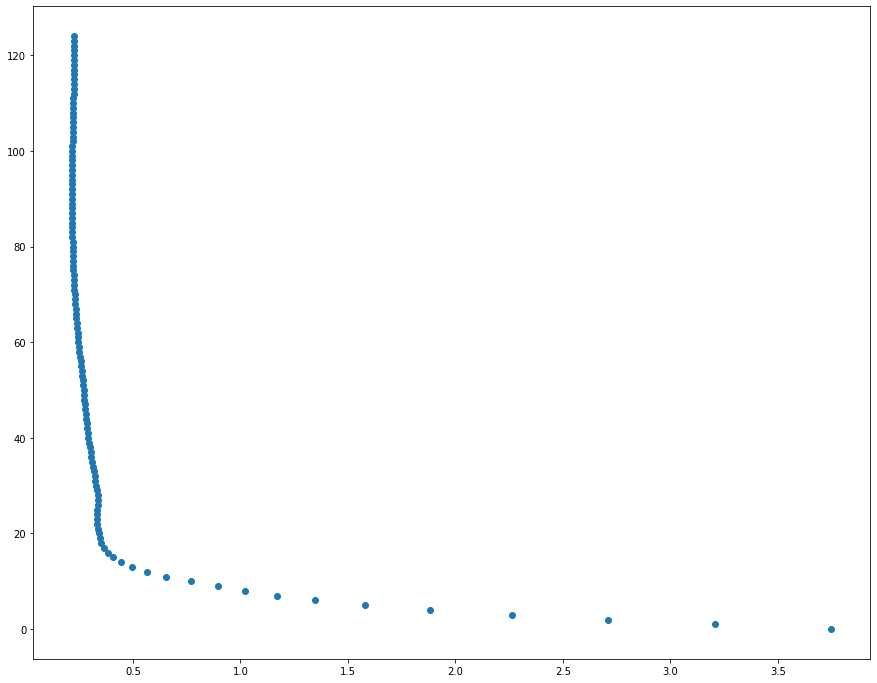

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
plt.scatter(x = loss_rate , y = [i for i in range(0,len(loss_rate))])
plt.show()